In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Uitgebreide_VKM_dataset_cleaned2.csv")

dataframe = df.copy()

In [31]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     207 non-null    int64  
 1   name                   207 non-null    object 
 2   shortdescription       207 non-null    object 
 3   description            207 non-null    object 
 4   content                207 non-null    object 
 5   studycredit            207 non-null    int64  
 6   location               207 non-null    object 
 7   contact_id             207 non-null    int64  
 8   level                  207 non-null    object 
 9   learningoutcomes       207 non-null    object 
 10  module_tags            207 non-null    object 
 11  interests_match_score  207 non-null    float64
 12  popularity_score       207 non-null    int64  
 13  estimated_difficulty   207 non-null    int64  
 14  available_spots        207 non-null    int64  
 15  start_

Descriptive Statistics:



,studycredit,interests_match_score,popularity_score,estimated_difficulty,available_spots
mean,21.521739,0.610386,253.618357,3.178744,49.743961
median,15.000000,0.620000,262.000000,3.000000,49.000000
min,15.000000,0.300000,10.000000,1.000000,20.000000
max,30.000000,0.940000,500.000000,5.000000,80.000000
std,7.453953,0.194009,141.167821,1.485180,18.036025


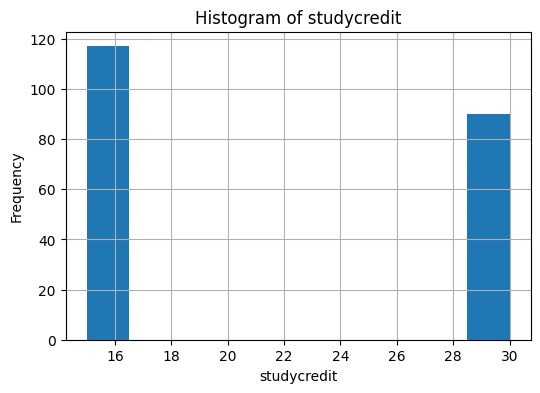

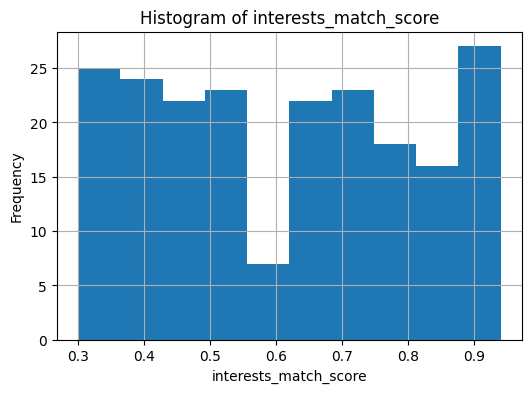

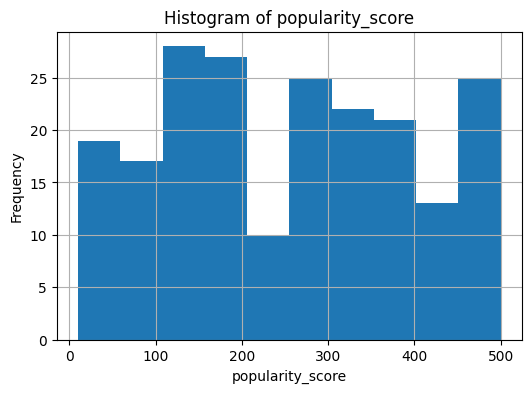

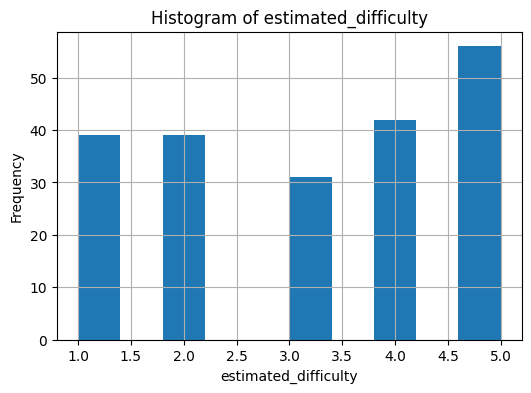

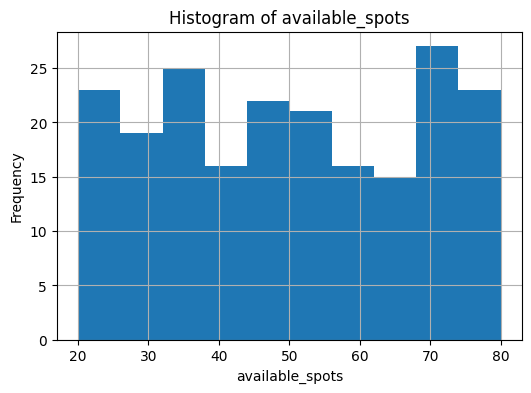

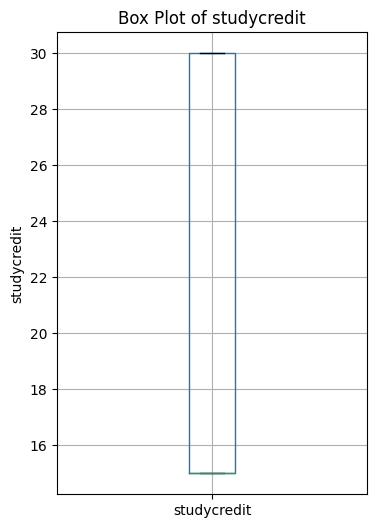

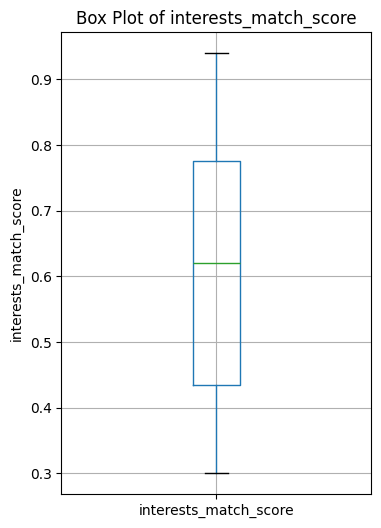

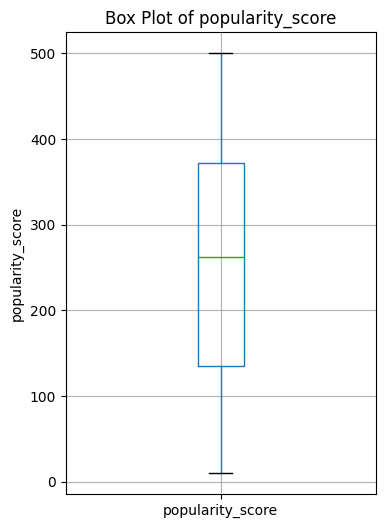

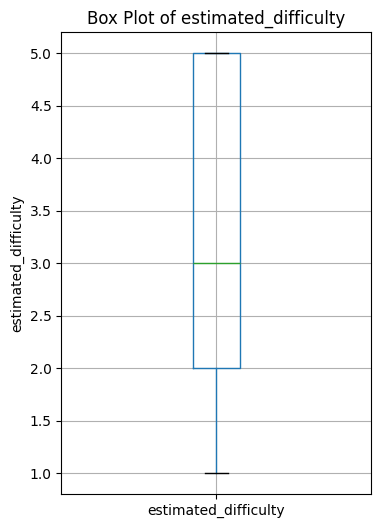

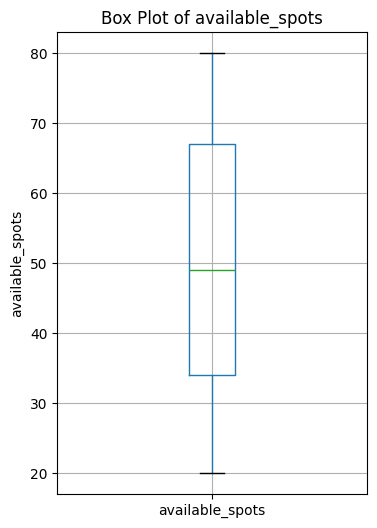

In [14]:
# Columns to analyze
num_cols = [
    "studycredit",
    "interests_match_score",
    "popularity_score",
    "estimated_difficulty",
    "available_spots"
]

# --- Descriptive Statistics ---
stats = dataframe[num_cols].agg(['mean', 'median', 'min', 'max', 'std'])
print("Descriptive Statistics:\n")
display(stats)

# --- Histograms ---
for col in num_cols:
    plt.figure(figsize=(6,4))
    dataframe[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# --- Box Plots ---
for col in num_cols:
    plt.figure(figsize=(4,6))
    dataframe.boxplot(column=col)
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

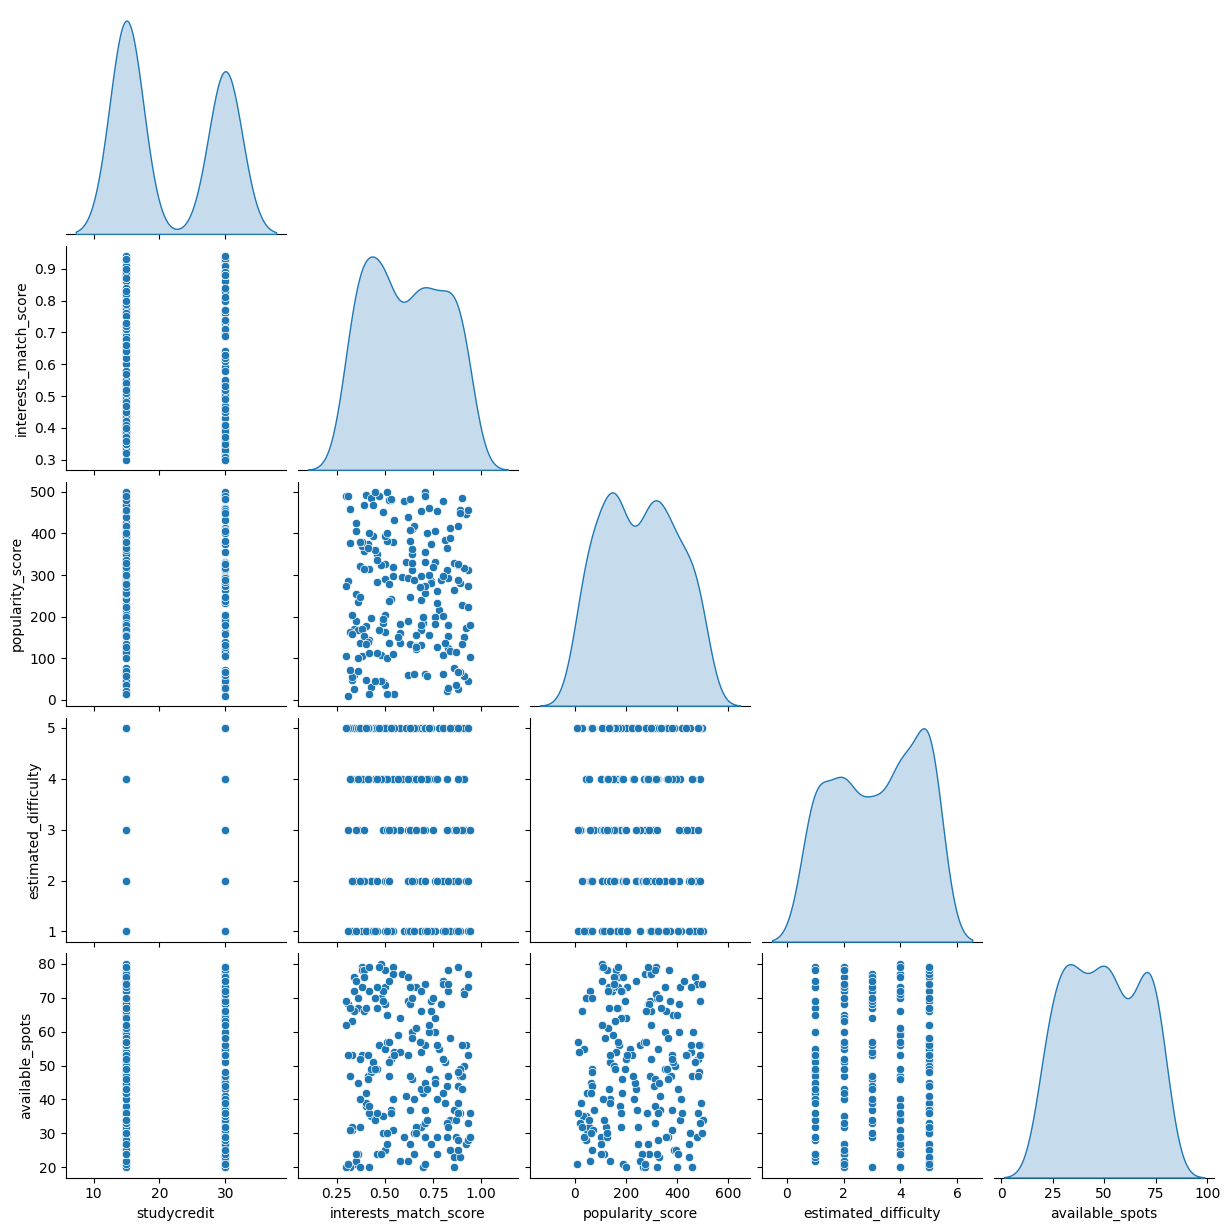

In [7]:
sns.pairplot(dataframe[num_cols], diag_kind="kde", corner=True)
plt.show()

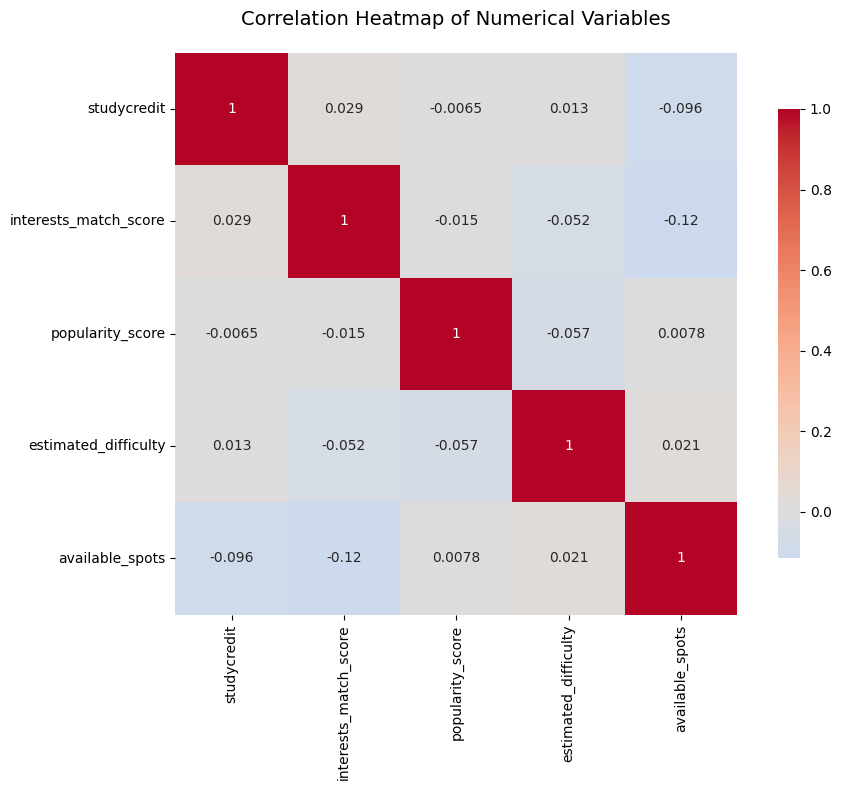

In [14]:
# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe[num_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square            # Format numbers to 2 decimal places
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of Numerical Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


=== Modules zonder module_tags ===
Aantal modules zonder tags: 0

=== Top 10 meest voorkomende tags ===
zorg: 18
welzijn: 15
design: 12
interdisciplinair: 12
innovatie: 12
onderzoek: 12
data: 12
storytelling: 10
smart: 9
industry: 7



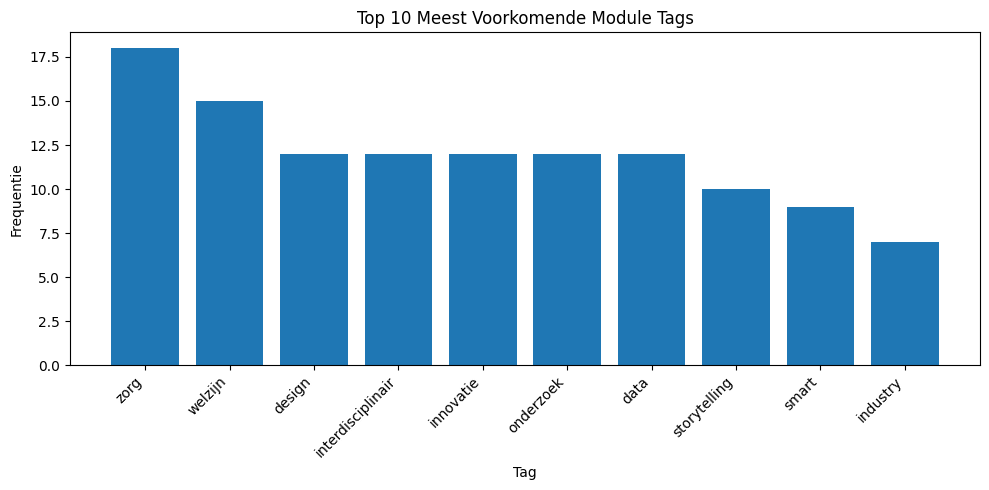

In [5]:
from collections import Counter

missing_tags = dataframe['module_tags'].isna().sum() + (dataframe['module_tags'] == "").sum()
print("=== Modules zonder module_tags ===")
print("Aantal modules zonder tags:", missing_tags)
print()

# =========================
# 6. Meest voorkomende woorden in module_tags
# =========================
tag_counter = Counter()

for tags in dataframe['module_tags'].dropna():
    if isinstance(tags, str):
        cleaned = tags.replace("[", "").replace("]", "").replace("'", "")
        parts = [t.strip() for t in cleaned.split(",") if t.strip()]
        tag_counter.update(parts)

top_n = 10
top_tags = tag_counter.most_common(top_n)

print(f"=== Top {top_n} meest voorkomende tags ===")
for tag, count in top_tags:
    print(f"{tag}: {count}")
print()

# Barplot top-tags
if top_tags:
    tags, counts = zip(*top_tags)

    plt.figure(figsize=(10, 5))
    plt.bar(tags, counts)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Tag")
    plt.ylabel("Frequentie")
    plt.title(f"Top {top_n} Meest Voorkomende Module Tags")
    plt.tight_layout()
    plt.show()
else:
    print("Geen tags gevonden om te plotten.")

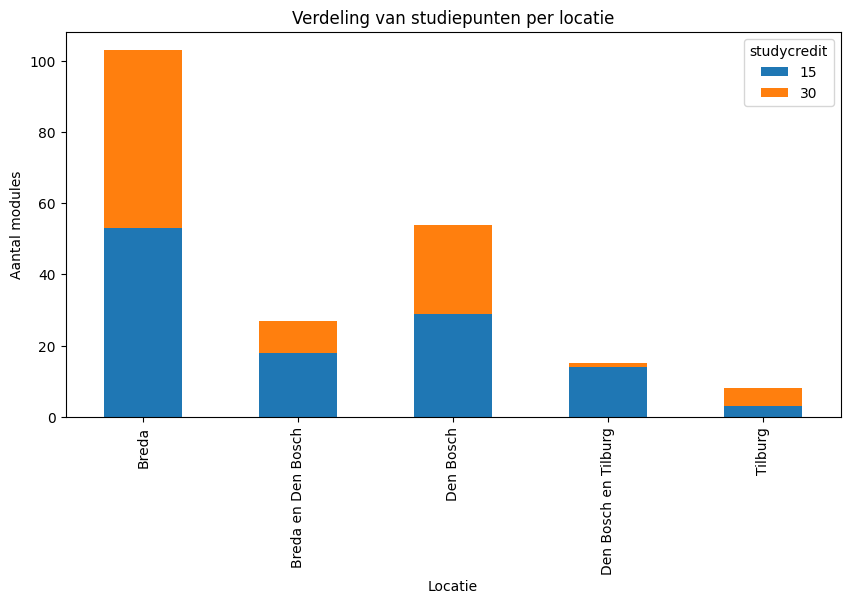

In [21]:
pd.crosstab(dataframe['location'], dataframe['studycredit']).plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Verdeling van studiepunten per locatie")
plt.xlabel("Locatie")
plt.ylabel("Aantal modules")
plt.show()

Chi-kwadraat: 114.33259599059683
p-waarde: 1.1018650880294053e-26


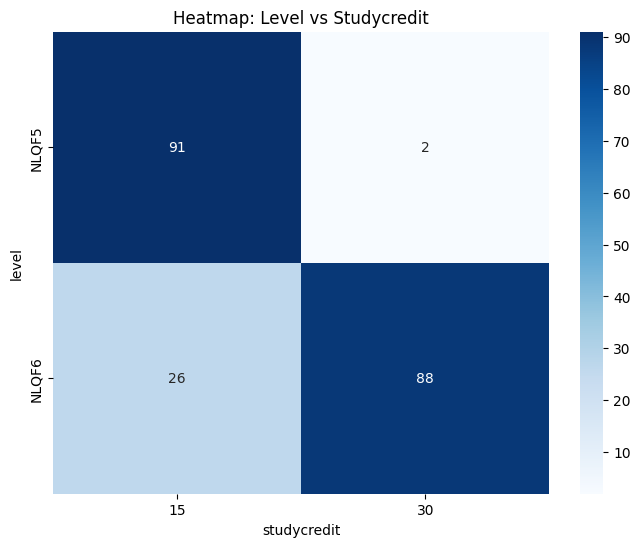

In [20]:
ct = pd.crosstab(dataframe['level'], dataframe['studycredit'])

from scipy.stats import chi2_contingency

table = pd.crosstab(dataframe['level'], dataframe['studycredit'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-kwadraat:", chi2)
print("p-waarde:", p)

plt.figure(figsize=(8,6))
sns.heatmap(ct, annot=True, cmap="Blues")
plt.title("Heatmap: Level vs Studycredit")
plt.show()

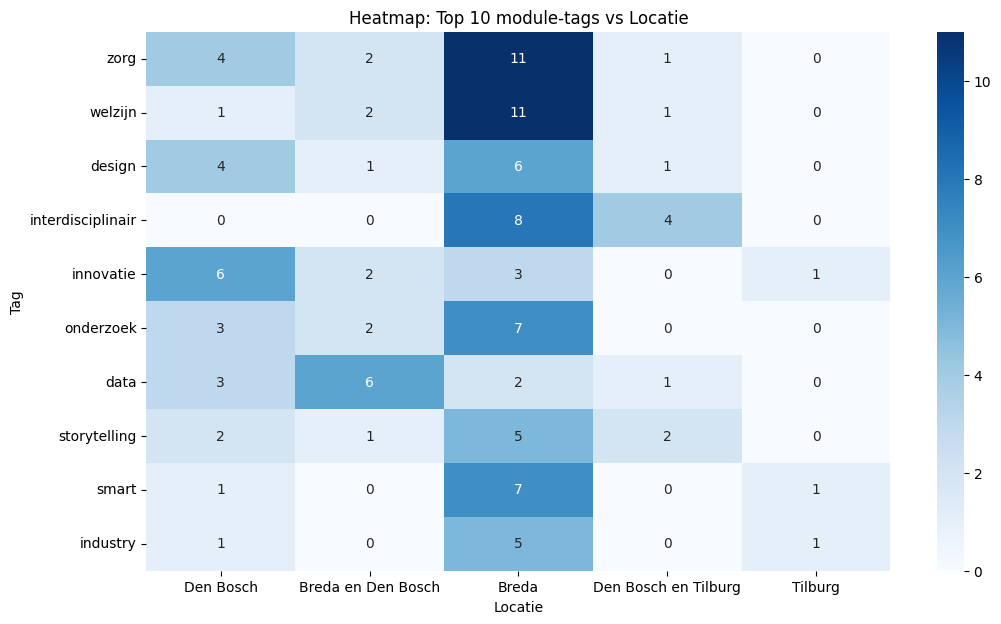

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def count_clean_tags(df, tag_col="module_tags"):
    all_tags = []

    for tags in df[tag_col]:
        if isinstance(tags, list):
            for t in tags:
                t = str(t).lower().strip()

                # SLUIT rommel uit (zoals losse letters, komma’s, spaties)
                if len(t) < 3:         # minimum lengte
                    continue
                if t.isnumeric():      # alleen cijfers → skip
                    continue
                if t in ["'", ",", ".", "-", " "]:
                    continue

                all_tags.append(t)

    return Counter(all_tags)

tag_freq = count_clean_tags(dataframe, "module_tags")

top_tags = [tag for tag, count in tag_freq.most_common(10)]

def build_tag_location_matrix(df, tag_col="module_tags", loc_col="location", top_tags=None):
    locations = df[loc_col].unique()
    
    matrix = pd.DataFrame(0, index=top_tags, columns=locations)

    for _, row in df.iterrows():
        loc = row[loc_col]
        tags = row[tag_col]

        if isinstance(tags, list):
            for t in tags:
                t = str(t).lower().strip()
                if t in top_tags:
                    matrix.loc[t, loc] += 1

    return matrix

heatmap_df = build_tag_location_matrix(dataframe, top_tags=top_tags)

plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_df, annot=True, cmap="Blues", fmt="d")
plt.title("Heatmap: Top 10 module-tags vs Locatie")
plt.xlabel("Locatie")
plt.ylabel("Tag")
plt.show()


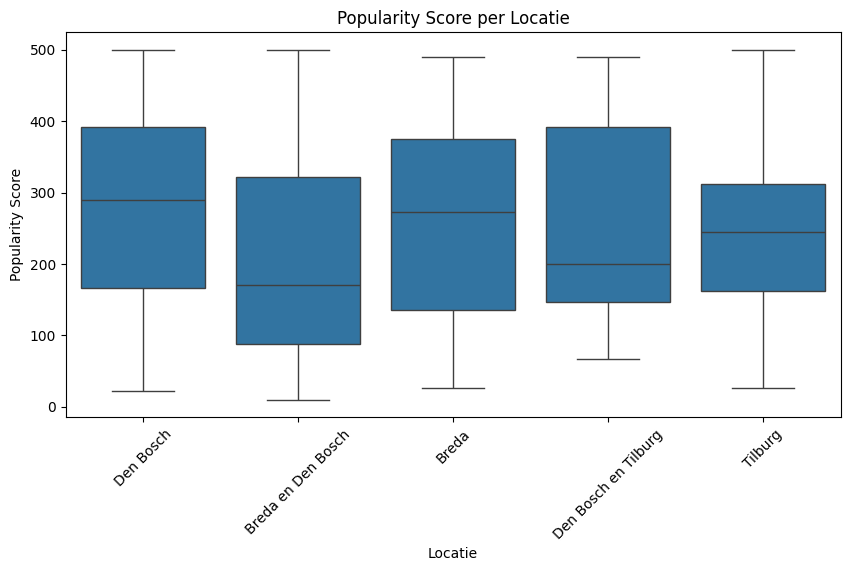

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=dataframe, x="location", y="popularity_score")
plt.title("Popularity Score per Locatie")
plt.xlabel("Locatie")
plt.ylabel("Popularity Score")
plt.xticks(rotation=45)
plt.show()

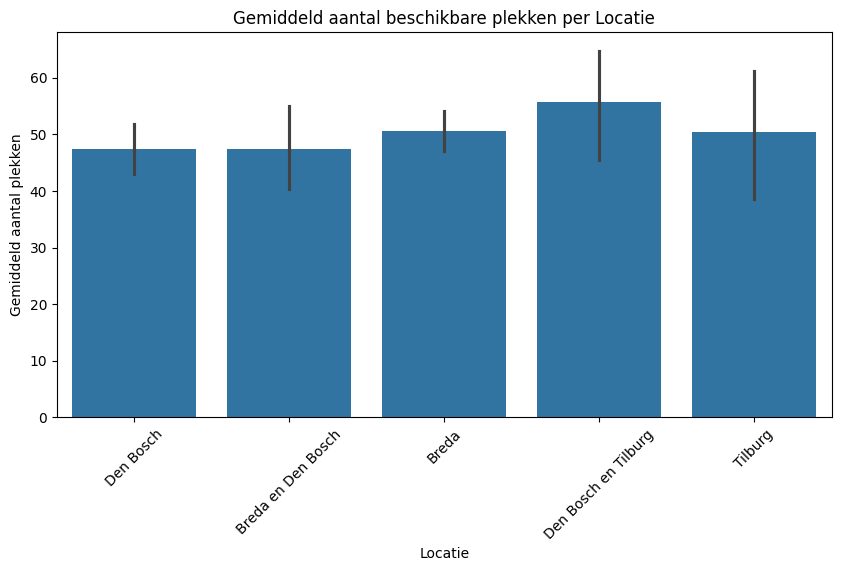

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=dataframe,
    x="location",
    y="available_spots",
    estimator="mean",
    errorbar=("ci", 95)
)
plt.title("Gemiddeld aantal beschikbare plekken per Locatie")
plt.xlabel("Locatie")
plt.ylabel("Gemiddeld aantal plekken")
plt.xticks(rotation=45)
plt.show()